In [1]:
# IMPORTS

from bs4 import BeautifulSoup
import requests
import csv
import pickle
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [9]:
def data_labelling(list_of_sections_html, filename, span_class = "d2edcug0 hpfvmrgz qv66sw1b c1et5uql lr9zc1uh a8c37x1j keod5gw0 nxhoafnm aigsh9s9 d3f4x2em fe6kdd0r mau55g9w c8b282yb iv3no6db jq4qci2q a3bd9o3v b1v8xokw oo9gr5id"):
    data = pd.DataFrame()
    for url in list_of_sections_html: #['comsec_1.html','comsec_2.html','comsec_3.html','comsec_4.html','comsec_5.html','comsec_6.html']:
        count_comment_processed = 0
        page = open(url, encoding="utf8")
        soup = BeautifulSoup(page.read())
        spans = soup.find_all('span', {'class' : span_class})
        lines = [span.get_text() for span in spans]
        df = pd.DataFrame(lines,columns=['Comment'])
        df['sentiment'] = ""
        for index, row in df.iterrows():
            print(row['Comment'])
            sentiment_judge = input()
            if sentiment_judge in ['q', 'quit', 'exit']:
                print(count_comment_processed, 'comments were labelled for this post...')
                break
            row['sentiment'] = sentiment_judge
            count_comment_processed +=1 
        data = pd.concat([data,df])
        print('Comment labelling finished for post.')
        print('Do you want to jump to next comment? (y/n)')
        jump = input()
        if jump in ['n', 'no', 'exit', 'q', 'quit']:
            break
            print('Labelling aborted.')
    print('Labelling finished.')
    
    data = data[data['sentiment']!='']

    with open(filename+'.pickle', 'wb') as handle:
        pickle.dump(data, handle)
        

In [58]:
def load_data(filename):
    data = pd.DataFrame()
    with open(filename + '.pickle', 'rb') as handle:
        data = pickle.load(handle)
    return data
        
def train_NB(X_train, y_train, count_vect, tf_transformer, tfidf_transformer):
    features = ['count', 'tf', 'tf_idf']
    
    X_train_counts = count_vect.fit_transform(X_train)
    X_train_tf = tf_transformer.transform(X_train_counts)
    X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
    
    text_clf_NBs = dict()
    for feature in features:
        X_train_ = X_train_counts
        if feature == 'tf':
            X_train_ = X_train_tf
        elif feature == 'tf_idf':
            X_train_ = X_train_tfidf

        print('Training Naive Bayes (' + feature +')... in progress...')
        clf = MultinomialNB()
        text_clf_NB = clf.fit(X_train_, y_train)
        text_clf_NBs[feature] = text_clf_NB
        
    return text_clf_NBs
        
def predict_NBs(X, y, models, count_vect, tf_transformer, tfidf_transformer, features = ['count', 'tf', 'tf_idf'], verb = 1):
    # PREDICT TEST DATA AND PRINT RESULTS
    predictions = dict()
    accuracies = dict()
    reports = dict()
    for feature in features:
        docs_test_counts = count_vect.transform(X)
        test = docs_test_counts
        if feature == 'tf':
            test = tf_transformer.transform(docs_test_counts) 
        elif feature == 'tf_idf':
            test = tfidf_transformer.transform(docs_test_counts) 

        #docs_test_tfidf = tfidf_transformer.transform(test)
        predicted = models[feature].predict(test)
        
        accuracy = np.mean(predicted == y)
        report = metrics.classification_report(y, predicted)
        
        if verb == 1:
            print('Naive Bayes accuracy (' + feature + '): ', accuracy)
            print('Naive Bayes Classification Report (' + feature + '): \n', report)

        predictions[feature] = predicted
        accuracies[feature] = accuracy
        reports[feature] = report
        #plt.figure(figsize = (12,12))
        #sns.heatmap(metrics.confusion_matrix(y, predicted), cmap="RdYlGn", annot = True, fmt='g')
        #plt.xlabel("Predicted Number")
        #plt.ylabel("True Number")
        #plt.show()
    return predictions, accuracies, reports

        

In [91]:
# Label comments by hand, use sentiments 'negative' (d), 'neutral' (s) and positive (a)

data_labelling(['comsec_12.html','comsec_13.html','comsec_14.html','comsec_15.html','comsec_16.html','comsec_17.html'], 'comment_data_3')


prepare_data.py:6: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 6 of the file prepare_data.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  


If it's his wish ,it should be granted.
a
He will score at BVB before Sancho score at United
a
I wish he can go back to a high pressing team like his previous club where he can fit in. Chelsea is so calm and boring and too defensive
a
Liverpool must take him
a
Hes good..but seems like he couldn’t fit into the system…haihh another talent wasted…
a
Come to barca
a
Barca need this guy , let him come and have some good football
a
THANK GOD have been saying it for a while he needs to move on from chelsea, he doesn't have future, chelsea should sell him and buy #benhrama
a
Then .get Rafinha
n
He can go We have excess 
a
He should go .. He is not strong physically..
a
He can go the door is open for him to leave, he is not performing overrated player, not good enough
a
If pep was the one who signed him before Chelsea he could have been a best player like Mahrez now but Tuchel is Tuchel a man who plays 6 defenders and 3 midfielders plus 1 striker how do you expect lukaku to score when you alway

n
He and Ole are on some serious Voodoo
n
Get well soon Legend of the game. YNWA
n
Did he just say he coped with it wellHe's been bang average after that link
q
56 comments were labelled for this post...
Comment labelling finished for post.
Do you want to jump to next comment? (y/n)
y
I don't know about Olmo but there is no way Ferran leaves CityAnd since when Barcelona has money
d
he wont get Ferran Torres because Pep has his own plan for Torres
d
In the process of trying to gather the Spain squad together,he will remain with Pain as the S will vanish
d
He wants to build and Spain together 
n
Humm all the players in this world are linked to xavi Na waow ooh u guys should just leave the social media alone and make noise after singing them 
n
I'm love for bacelona is very strong that you can't compare
n
Your private prayers will turn into public blessings  
n
These people (FIFA) are after their own pockets without considering the lives of the cows (Players). Selfish beings. 
n
Welcome t

a
We are waiting for Transfer Of Maguire And Sacking of Ole Gunar  please update us on this two shits
n
It'll be lovely to have Trippier in United... He's both good defensively and forward pushing...
a
C'mon Newcastle have respect for your elders...
d
Why would he give up play in the sun and go to a cold city like they we'll maybe 4 the 
d
Don't beat them off the pitch please Newcastle.wait for your next meeting.
d
Good player
a
Beating us how it's can't compete with Newcastle in the transfer market we are a dead club depending on commercial deals n ucl participation/epl revenue bto survive
n
Arabian money, only time will tell, spend wisely this is Premier League
n
Signing more players while Ole is still in charge is a waste of time and resources.
n
Why did Tottenham offload this guy self
n
He wasn’t never registered to Manchester United so plz don’t try to create unnecessary attention & we better understand this sought of fake initiatives those are taken by media
n
This Newcastle Unit

In [112]:
# load data
data1 = load_data('comment_data_1')
data2 = load_data('comment_data_2')
data3 = load_data('comment_data_3')
data = pd.concat([data1, data2, data3])
data = data[data['sentiment']!='']

In [107]:
data

,Comment,sentiment
0,They don't follow my account because I have a ...,n
1,They should go for Lampard,d
2,"God forbid Bad thing, How we go from Ole to Ol...",d
3,What happened to Zidane? I swear United are a...,d
4,Let us just manage Zidane... Brenda is an aver...,d
...,...,...
22,I don't have more followers but I'm grateful f...,n
23,He is good!,a
24,He's a good goal keeper but he can't bench De ...,d
25,He will end up at Newcastle United and the Geo...,n


In [113]:
# train-test split and data transformation

X_train, X_test, y_train, y_test = train_test_split(list(data['Comment']), list(data['sentiment']), test_size=0.2)

# count
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
print('Train set (Count) Shape: ', X_train_counts.shape)
    # tf
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
print('Train set (TF) Shape: ', X_train_tf.shape)
    # tf-idf
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print('Train set (TF-IDF) Shape: ', X_train_tfidf.shape)

Train set (Count) Shape:  (431, 1405)
Train set (TF) Shape:  (431, 1405)
Train set (TF-IDF) Shape:  (431, 1405)


In [114]:
# Train Naive Bayes models for comment sentiment classification
models = train_NB(X_train, y_train, count_vect, tf_transformer, tfidf_transformer)

Training Naive Bayes (count)... in progress...
Training Naive Bayes (tf)... in progress...
Training Naive Bayes (tf_idf)... in progress...


In [115]:
# evaluation on test set
preds, accs, reps = predict_NBs(X_test, y_test, models, count_vect, tf_transformer, tfidf_transformer)

Naive Bayes accuracy (count):  0.5092592592592593
Naive Bayes Classification Report (count): 
               precision    recall  f1-score   support

           a       0.47      0.65      0.55        37
           d       0.43      0.64      0.51        28
           n       0.87      0.30      0.45        43

    accuracy                           0.51       108
   macro avg       0.59      0.53      0.50       108
weighted avg       0.62      0.51      0.50       108

Naive Bayes accuracy (tf):  0.48148148148148145
Naive Bayes Classification Report (tf): 
               precision    recall  f1-score   support

           a       0.44      0.68      0.53        37
           d       0.41      0.57      0.48        28
           n       0.92      0.26      0.40        43

    accuracy                           0.48       108
   macro avg       0.59      0.50      0.47       108
weighted avg       0.62      0.48      0.47       108

Naive Bayes accuracy (tf_idf):  0.49074074074074076
N

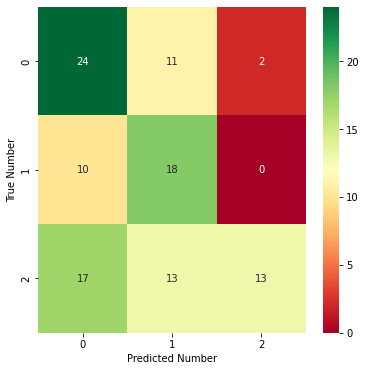

In [117]:
# confusion matrix on test set 
p = preds['count']
plt.figure(figsize = (6,6))
sns.heatmap(metrics.confusion_matrix(y_test, p), cmap="RdYlGn", annot = True, fmt='g')
plt.xlabel("Predicted Number")
plt.ylabel("True Number")
plt.show()